# Basic Functionality




**Outcomes**

- Be familiar with `datetime`  
- Use built-in aggregation functions and be able to create your own and
  apply them using `agg`  
- Use built-in Series transformation functions and be able to create your
  own and apply them using `apply`  
- Use built-in scalar transformation functions and be able to create your
  own and apply them using `applymap`  
- Be able to select subsets of the DataFrame using boolean selection  
- Know what the “want operator” is and how to apply it  




## Outline

- [Basic Functionality](#Basic-Functionality)  
  - [Dates in pandas](#Dates-in-pandas)  
  - [DataFrame Aggregations](#DataFrame-Aggregations)  
  - [Transforms](#Transforms)  
  - [Boolean Selection](#Boolean-Selection)  
  - [Exercises](#Exercises)  

In [1]:
# Uncomment following line to install on colab
#! pip install qeds

## Industry portfolios data

In this lecture, we will use industry portfolio  data by industry at a monthly
frequency.

those are portfolio of stocks of firms in different sectors of the economy

In [2]:
import pandas as pd

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

pd.__version__

'1.2.3'

First, we will download the data directly from a url and read it into a pandas DataFrame.

In [14]:
## Load up the data -- this will take a couple seconds
url = "https://raw.githubusercontent.com/amoreira2/Lectures/main/assets/data/49_Industry_Portfolios.CSV"
industret_raw = pd.read_csv(url, parse_dates=["Date"])

The pandas `read_csv` will determine most datatypes of the underlying columns.  The
exception here is that we need to give pandas a hint so it can load up the `Date` column as a Python datetime type: the `parse_dates=["Date"]`.

We can see the basic structure of the downloaded data by getting the first 5 rows, which directly matches
the underlying CSV file.

In [15]:
industret_raw.head()

,Date,industry,returns,nfirms,size
0,1926-07-31,Agric,2.37,3,99.80
1,1926-07-31,Food,0.12,40,31.19
2,1926-07-31,Soda,-99.99,0,-99.99
3,1926-07-31,Beer,-5.19,3,7.12
4,1926-07-31,Smoke,1.29,16,59.72


Note that a row has a date, industry , returns, number of firms in the portfolio and  average size of the firm.

Note also the -99.99 which in this case is code for missing observation

For our analysis, we want to look at the firm size across different industries over time, which
requires a transformation of the data similar to an Excel pivot-table.

In [17]:
# Don't worry about the details here quite yet
size_all = (
    industret_raw
    .reset_index()
    .pivot_table(index="Date", columns="industry", values="size")
)
size_all.head()

industry,Aero,Agric,Autos,Banks,Beer,BldMt,Books,Boxes,BusSv,Chems,...,Smoke,Soda,Softw,Steel,Telcm,Toys,Trans,Txtls,Util,Whlsl
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,9.52,99.80,47.55,14.50,7.12,20.80,4.33,35.35,11.21,57.59,...,59.72,-99.99,-99.99,48.56,350.36,13.00,68.67,5.78,81.22,1.19
1926-08-31,9.46,102.06,55.11,15.17,6.75,21.30,6.50,37.86,11.81,62.13,...,60.47,-99.99,-99.99,50.39,353.27,14.12,69.79,5.79,86.81,0.90
1926-09-30,8.78,104.34,57.11,16.97,8.58,22.27,9.29,36.82,11.99,65.53,...,64.03,-99.99,-99.99,51.21,360.96,16.50,72.90,6.25,85.01,0.95
1926-10-31,8.15,102.91,59.69,16.46,8.92,22.04,8.83,34.77,12.01,68.47,...,64.42,-99.99,-99.99,51.02,364.16,17.88,72.71,6.36,86.41,0.88
1926-11-30,7.07,102.34,54.81,14.52,8.62,21.05,9.31,32.80,12.17,65.06,...,65.08,-99.99,-99.99,48.90,363.74,17.62,70.58,6.38,83.92,0.74


In [18]:
size_all.columns

Index(['Aero ', 'Agric', 'Autos', 'Banks', 'Beer ', 'BldMt', 'Books', 'Boxes',
       'BusSv', 'Chems', 'Chips', 'Clths', 'Cnstr', 'Coal ', 'Drugs', 'ElcEq',
       'FabPr', 'Fin  ', 'Food ', 'Fun  ', 'Gold ', 'Guns ', 'Hardw', 'Hlth ',
       'Hshld', 'Insur', 'LabEq', 'Mach ', 'Meals', 'MedEq', 'Mines', 'Oil  ',
       'Other', 'Paper', 'PerSv', 'RlEst', 'Rtail', 'Rubbr', 'Ships', 'Smoke',
       'Soda ', 'Softw', 'Steel', 'Telcm', 'Toys ', 'Trans', 'Txtls', 'Util ',
       'Whlsl'],
      dtype='object', name='industry')

Finally, we can filter it to look at a subset of the columns (i.e. “state” in this case).

In [23]:
industries = [
    "Autos","Banks", "Meals", "Softw",
    "Smoke", "Telcm", "Mines"
]
size = size_all[industries]
size.tail()

industry,Autos,Banks,Meals,Softw,Smoke,Telcm,Mines
Date,,,,,,,
2020-11-30,11504.82,5372.76,8638.65,22509.62,59424.37,20127.11,7379.30
2020-12-31,15667.02,6344.33,9595.61,24701.31,64210.14,23242.82,8377.75
2021-01-31,18292.42,6813.01,9983.06,25503.86,68622.27,24468.39,9186.89
2021-02-28,20561.46,6581.58,9531.13,25834.04,67059.98,23911.24,9376.07
2021-03-31,18531.08,7511.02,10445.51,26799.04,70900.88,24972.99,10770.47


When plotting, a DataFrame knows the column and index names.

<AxesSubplot:xlabel='Date'>

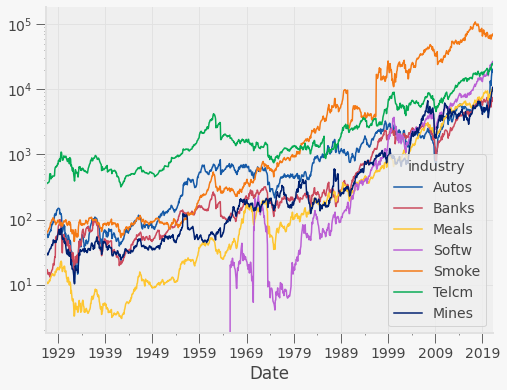

In [24]:
size.plot(figsize=(8, 6),logy=True)


<a id='exercise-0'></a>
> See exercise 1 in the [*exercise list*](#exerciselist-0)

## Dates in pandas

You might have noticed that our index now has a nice format for the
dates (`YYYY-MM-DD`) rather than just a year.

This is because the `dtype` of the index is a variant of `datetime`.

In [25]:
size.index

DatetimeIndex(['1926-07-31', '1926-08-31', '1926-09-30', '1926-10-31',
               '1926-11-30', '1926-12-31', '1927-01-31', '1927-02-28',
               '1927-03-31', '1927-04-30',
               ...
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
               '2021-02-28', '2021-03-31'],
              dtype='datetime64[ns]', name='Date', length=1137, freq=None)

We can index into a DataFrame with a `DatetimeIndex` using string
representations of dates.

For example

In [27]:
# Data corresponding to a single date
size.loc["01/31/2000", :]

industry
Autos     2461.97
Banks     2249.50
Meals      800.97
Softw     3597.20
Smoke    12584.58
Telcm     8978.29
Mines      967.26
Name: 2000-01-31 00:00:00, dtype: float64

In [28]:
# Data for all days between New Years Day and June first in the year 2000
size.loc["01/31/2000":"06/30/2000", :]

industry,Autos,Banks,Meals,Softw,Smoke,Telcm,Mines
Date,,,,,,,
2000-01-31,2461.97,2249.50,800.97,3597.20,12584.58,8978.29,967.26
2000-02-29,2504.11,2203.67,741.71,3270.95,11499.46,8739.86,955.71
2000-03-31,2290.96,1974.93,652.38,3603.68,11038.70,8463.58,881.00
2000-04-30,2545.41,2291.46,767.18,3733.34,11335.75,9098.77,938.08
2000-05-31,2873.71,2225.48,796.35,3050.85,14605.66,8217.91,865.02
2000-06-30,2458.02,2414.05,762.56,2740.98,17434.72,7235.48,871.13


We will learn more about what pandas can do with dates and times in an
upcoming lecture on time series data.

## DataFrame Aggregations

Let’s talk about *aggregations*.

Loosely speaking, an aggregation is an operation that combines multiple
values into a single value.

For example, computing the mean of three numbers (for example
`[0, 1, 2]`) returns a single number (1).

We will use aggregations extensively as we analyze and manipulate our data.

Thankfully, pandas makes this easy!

### Built-in Aggregations

pandas already has some of the most frequently used aggregations.

For example:

- Mean  (`mean`)  
- Variance (`var`)  
- Standard deviation (`std`)  
- Minimum (`min`)  
- Median (`median`)  
- Maximum (`max`)  
- etc…  


>**Note**
>
>When looking for common operations, using “tab completion” goes a long way.

In [29]:
size.mean()

industry
Autos     1271.677274
Banks      952.728619
Meals      984.425286
Softw     1550.233544
Smoke    12058.789384
Telcm     3468.995172
Mines      970.964626
dtype: float64

As seen above, the aggregation’s default is to aggregate each column.

However, by using the `axis` keyword argument, you can do aggregations by
row as well.

In [30]:
size.var(axis=1).head()

Date
1926-07-31    19263.014148
1926-08-31    19496.461081
1926-09-30    20222.654548
1926-10-31    20548.252614
1926-11-30    20565.567314
dtype: float64

### Writing Your Own Aggregation

The built-in aggregations will get us pretty far in our analysis, but
sometimes we need more flexibility.

We can have pandas perform custom aggregations by following these two
steps:

1. Write a Python function that takes a `Series` as an input and
  outputs a single value.  
1. Call the `agg` method with our new function as an argument.  


For example, below, we will classify industry as “high return” or
“low return ” based on whether their mean returns is above 1% per month

In [63]:
returns_all = (
    industret_raw
    .reset_index()
    .pivot_table(index="Date", columns="industry", values="returns")
)
returns=returns_all[industries]

In [64]:
#
# Step 1: We write the (aggregation) function that we'd like to use
#
def high_or_low(s):
    """
    This function takes a pandas Series object and returns high
    if the mean is above 1 and low if the mean is below 0
    """
    if s.mean() < 1:
        out = "low"
    else:
        out = "high"

    return out

In [66]:
#
# Step 2: Apply it via the agg method.
#
returns.agg(high_or_low)

industry
Autos    high
Banks    high
Meals    high
Softw     low
Smoke    high
Telcm     low
Mines    high
dtype: object

In [68]:
# How does this differ from returns.agg(high_or_low)?
returns.agg(high_or_low, axis=1).tail()

Date
2020-11-30    high
2020-12-31    high
2021-01-31     low
2021-02-28    high
2021-03-31    high
dtype: object

Notice that `agg` can also accept multiple functions at once.

In [72]:
returns.agg([min, max,'mean','std', high_or_low])

,Autos,Banks,Meals,Softw,Smoke,Telcm,Mines
min,-36.41,-34.0,-31.33,-99.99,-24.93,-21.56,-34.75
max,81.88,41.79,30.65,73.65,33.04,28.17,46.1
mean,1.181609,1.1673,1.080598,-40.541838,1.140923,0.864908,1.03496
std,8.22145,7.04797,6.48647,50.469517,5.822801,4.610285,7.28218
high_or_low,high,high,high,low,high,low,high


## Transforms

Many analytical operations do not necessarily involve an aggregation.

The output of a function applied to a Series might need to be a new
Series.

Some examples:

- Compute the percentage change in average firm size from month to month.  
- Calculate the cumulative sum of elements in each column.  

### Built-in Transforms

pandas comes with many transform functions including:

- Cumulative sum/max/min/product (`cum(sum|min|max|prod)`)  
- Difference  (`diff`)  
- Elementwise addition/subtraction/multiplication/division (`+`, `-`, `*`, `/`)  
- Percent change (`pct_change`)  
- Number of occurrences of each distinct value (`value_counts`)  
- Absolute value (`abs`)  


Again, tab completion is helpful when trying to find these functions.

In [73]:
size.head()

industry,Autos,Banks,Meals,Softw,Smoke,Telcm,Mines
Date,,,,,,,
1926-07-31,47.55,14.50,10.82,-99.99,59.72,350.36,27.74
1926-08-31,55.11,15.17,11.00,-99.99,60.47,353.27,29.30
1926-09-30,57.11,16.97,10.94,-99.99,64.03,360.96,29.45
1926-10-31,59.69,16.46,10.80,-99.99,64.42,364.16,29.46
1926-11-30,54.81,14.52,10.33,-99.99,65.08,363.74,28.51


In [74]:
size.pct_change().head()

industry,Autos,Banks,Meals,Softw,Smoke,Telcm,Mines
Date,,,,,,,
1926-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-08-31,0.158991,0.046207,0.016636,0.0,0.012559,0.008306,0.056236
1926-09-30,0.036291,0.118655,-0.005455,0.0,0.058872,0.021768,0.005119
1926-10-31,0.045176,-0.030053,-0.012797,0.0,0.006091,0.008865,0.000340
1926-11-30,-0.081756,-0.117861,-0.043519,0.0,0.010245,-0.001153,-0.032247


In [75]:
size.diff().head()

industry,Autos,Banks,Meals,Softw,Smoke,Telcm,Mines
Date,,,,,,,
1926-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926-08-31,7.56,0.67,0.18,0.0,0.75,2.91,1.56
1926-09-30,2.00,1.80,-0.06,0.0,3.56,7.69,0.15
1926-10-31,2.58,-0.51,-0.14,0.0,0.39,3.20,0.01
1926-11-30,-4.88,-1.94,-0.47,0.0,0.66,-0.42,-0.95


Transforms can be split into to several main categories:

1. *Series transforms*: functions that take in one Series and produce another Series. The index of the input and output does not need to be the same.  
1. *Scalar transforms*: functions that take a single value and produce a single value. An example is the `abs` method, or adding a constant to each value of a Series.  

### Custom Series Transforms

pandas also simplifies applying custom Series transforms to a Series or the
columns of a DataFrame. The steps are:

1. Write a Python function that takes a Series and outputs a new Series.  
1. Pass our new function as an argument to the `apply` method (alternatively, the `transform` method).  


As an example, we will standardize our return data to have mean 0
and standard deviation 1.

After doing this, we can use an aggregation to determine at which date the
return is most different from “normal times” for each state.

In [76]:
#
# Step 1: We write the Series transform function that we'd like to use
#
def standardize_data(x):
    """
    Changes the data in a Series to become mean 0 with standard deviation 1
    """
    mu = x.mean()
    std = x.std()

    return (x - mu)/std

In [78]:
#
# Step 2: Apply our function via the apply method.
#
std_returns = returns.apply(standardize_data)
std_returns.head()

industry,Autos,Banks,Meals,Softw,Smoke,Telcm,Mines
Date,,,,,,,
1926-07-31,1.849843,0.488467,0.121700,-1.177902,0.025602,-0.007572,0.632371
1926-08-31,0.370785,1.512875,-0.186634,-1.177902,0.920361,0.283083,-0.066595
1926-09-30,0.443765,-0.413921,-0.252926,-1.177902,0.020450,0.335140,0.096817
1926-10-31,-1.108273,-1.842701,-0.800219,-1.177902,-0.013898,-0.211464,-0.581551
1926-11-30,-0.224001,-0.587020,0.500951,-1.177902,0.585470,0.165953,1.019618


In [79]:
# Takes the absolute value of all elements of a function
abs_std_returns = std_returns.abs()

abs_std_returns.head()

industry,Autos,Banks,Meals,Softw,Smoke,Telcm,Mines
Date,,,,,,,
1926-07-31,1.849843,0.488467,0.121700,1.177902,0.025602,0.007572,0.632371
1926-08-31,0.370785,1.512875,0.186634,1.177902,0.920361,0.283083,0.066595
1926-09-30,0.443765,0.413921,0.252926,1.177902,0.020450,0.335140,0.096817
1926-10-31,1.108273,1.842701,0.800219,1.177902,0.013898,0.211464,0.581551
1926-11-30,0.224001,0.587020,0.500951,1.177902,0.585470,0.165953,1.019618


In [80]:
# find the date when returns was "most different from normal" for each industry
def idxmax(x):
    # idxmax of Series will return index of maximal value
    return x.idxmax()

abs_std_returns.agg(idxmax)

industry
Autos   1933-04-30
Banks   1933-04-30
Meals   1973-11-30
Softw   1970-09-30
Smoke   1933-04-30
Telcm   1932-08-31
Mines   1932-07-31
dtype: datetime64[ns]

### Custom Scalar Transforms

As you may have predicted, we can also apply custom scalar transforms to our
pandas data.

To do this, we use the following pattern:

1. Define a Python function that takes in a scalar and produces a scalar.  
1. Pass this function as an argument to the `applymap` Series or DataFrame method.  




## Boolean Selection

We have seen how we can select subsets of data by referring to the index
or column names.

However, we often want to select based on conditions met by
the data itself.

Some examples are:

- Restrict analysis to all individuals older than 18.  
- Look at data that corresponds to particular time periods.  
- Analyze only data that corresponds to a recession.  
- Obtain data for a specific product or customer ID.  


We will be able to do this by using a Series or list of boolean values
to index into a Series or DataFrame.

Let’s look at some examples.

In [83]:
size_small = size.head()  # Create smaller data so we can see what's happening
size_small

industry,Autos,Banks,Meals,Softw,Smoke,Telcm,Mines
Date,,,,,,,
1926-07-31,47.55,14.50,10.82,-99.99,59.72,350.36,27.74
1926-08-31,55.11,15.17,11.00,-99.99,60.47,353.27,29.30
1926-09-30,57.11,16.97,10.94,-99.99,64.03,360.96,29.45
1926-10-31,59.69,16.46,10.80,-99.99,64.42,364.16,29.46
1926-11-30,54.81,14.52,10.33,-99.99,65.08,363.74,28.51


In [84]:
# list of booleans selects rows
size_small.loc[[True, True, True, False, False]]

industry,Autos,Banks,Meals,Softw,Smoke,Telcm,Mines
Date,,,,,,,
1926-07-31,47.55,14.50,10.82,-99.99,59.72,350.36,27.74
1926-08-31,55.11,15.17,11.00,-99.99,60.47,353.27,29.30
1926-09-30,57.11,16.97,10.94,-99.99,64.03,360.96,29.45


In [85]:
# second argument selects columns, the  ``:``  means "all".
# here we use it to select all columns
size_small.loc[[True, False, True, False, True], :]

industry,Autos,Banks,Meals,Softw,Smoke,Telcm,Mines
Date,,,,,,,
1926-07-31,47.55,14.50,10.82,-99.99,59.72,350.36,27.74
1926-09-30,57.11,16.97,10.94,-99.99,64.03,360.96,29.45
1926-11-30,54.81,14.52,10.33,-99.99,65.08,363.74,28.51


In [86]:
# can use booleans to select both rows and columns
size_small.loc[[True, True, True, False, False], [True, False, False, False, False, True, True]]

industry,Autos,Telcm,Mines
Date,,,
1926-07-31,47.55,350.36,27.74
1926-08-31,55.11,353.27,29.30
1926-09-30,57.11,360.96,29.45


### Creating Boolean DataFrames/Series

We can use [conditional statements](../python_fundamentals/control_flow.ipynb) to
construct Series of booleans from our data.

In [90]:
size_small["Autos"] <55

Date
1926-07-31     True
1926-08-31    False
1926-09-30    False
1926-10-31    False
1926-11-30     True
Name: Autos, dtype: bool

Once we have our Series of bools, we can use it to extract subsets of
rows from our DataFrame.

In [91]:
size_small.loc[size_small["Autos"] < 55]

industry,Autos,Banks,Meals,Softw,Smoke,Telcm,Mines
Date,,,,,,,
1926-07-31,47.55,14.50,10.82,-99.99,59.72,350.36,27.74
1926-11-30,54.81,14.52,10.33,-99.99,65.08,363.74,28.51


In [93]:
size_small["Banks"] > size_small["Autos"]

Date
1926-07-31    False
1926-08-31    False
1926-09-30    False
1926-10-31    False
1926-11-30    False
dtype: bool

In [94]:
big_Autos = size_small["Autos"] > size_small["Banks"]
size_small.loc[big_Autos]

industry,Autos,Banks,Meals,Softw,Smoke,Telcm,Mines
Date,,,,,,,
1926-07-31,47.55,14.50,10.82,-99.99,59.72,350.36,27.74
1926-08-31,55.11,15.17,11.00,-99.99,60.47,353.27,29.30
1926-09-30,57.11,16.97,10.94,-99.99,64.03,360.96,29.45
1926-10-31,59.69,16.46,10.80,-99.99,64.42,364.16,29.46
1926-11-30,54.81,14.52,10.33,-99.99,65.08,363.74,28.51


#### Multiple Conditions

In the boolean section of the [basics lecture](../python_fundamentals/basics.ipynb), we saw
that we can use the words `and` and `or` to combine multiple booleans into
a single bool.

Recall:

- `True and False -> False`  
- `True and True -> True`  
- `False and False -> False`  
- `True or False -> True`  
- `True or True -> True`  
- `False or False -> False`  


We can do something similar in pandas, but instead of
`bool1 and bool2` we write:

```python
(bool_series1) & (bool_series2)
```


Likewise, instead of `bool1 or bool2` we write:

```python
(bool_series1) | (bool_series2)
```


In [95]:
small_BksAut = (size_small["Banks"] < 15) & (size_small["Autos"] < 56)
small_BksAut

Date
1926-07-31     True
1926-08-31    False
1926-09-30    False
1926-10-31    False
1926-11-30     True
dtype: bool

In [96]:
size_small[small_BksAut]

industry,Autos,Banks,Meals,Softw,Smoke,Telcm,Mines
Date,,,,,,,
1926-07-31,47.55,14.50,10.82,-99.99,59.72,350.36,27.74
1926-11-30,54.81,14.52,10.33,-99.99,65.08,363.74,28.51


#### `isin`

Sometimes, we will want to check whether a data point takes on one of a
several fixed values.

We could do this by writing `(df["x"] == val_1) | (df["x"] == val_2)`
(like we did above), but there is a better way: the `.isin` method

In [98]:
size_small["Smoke"].isin([60.47, 64.42])

Date
1926-07-31    False
1926-08-31     True
1926-09-30    False
1926-10-31     True
1926-11-30    False
Name: Smoke, dtype: bool

In [99]:
# now select full rows where this Series is True
size_small.loc[size_small["Smoke"].isin([60.47, 64.42])]

industry,Autos,Banks,Meals,Softw,Smoke,Telcm,Mines
Date,,,,,,,
1926-08-31,55.11,15.17,11.0,-99.99,60.47,353.27,29.30
1926-10-31,59.69,16.46,10.8,-99.99,64.42,364.16,29.46


#### `.any` and `.all`

Recall from the boolean section of the [basics lecture](../python_fundamentals/basics.ipynb)
that the Python functions `any` and `all` are aggregation functions that
take a collection of booleans and return a single boolean.

`any` returns True whenever at least one of the inputs are True while
`all` is True only when all the inputs are `True`.

Series and DataFrames with `dtype` bool have `.any` and `.all`
methods that apply this logic to pandas objects.

Let’s use these methods to count how many months all the states in our
sample had low returns.

As we work through this example, consider the [“want
operator”], a helpful
concept from Nobel Laureate [Tom
Sargent](http://www.tomsargent.com) for clearly stating the goal of our analysis and
determining the steps necessary to reach the goal.

We always begin by writing `Want:` followed by what we want to
accomplish.

In this case, we would write:

> Want: Count the number of months in which all industries in our sample
had returns less than -5%


After identifying the **want**, we work *backwards* to identify the
steps necessary to accomplish our goal.

So, starting from the result, we have:

1. Sum the number of `True` values in a Series indicating dates for
  which all industries had low returns.  
1. Build the Series used in the last step by using the `.all` method
  on a DataFrame containing booleans indicating whether each industry had
 low returns at each date.  
1. Build the DataFrame used in the previous step using a `<`
  comparison.  


Now that we have a clear plan, let’s follow through and *apply* the want
operator:

In [104]:
# Step 3: construct the DataFrame of bools
low = returns_all < -5
low.head()

industry,Aero,Agric,Autos,Banks,Beer,BldMt,Books,Boxes,BusSv,Chems,...,Smoke,Soda,Softw,Steel,Telcm,Toys,Trans,Txtls,Util,Whlsl
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,False,False,False,False,True,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,True
1926-08-31,True,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1926-09-30,True,False,False,False,False,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,True
1926-10-31,True,False,True,True,False,False,False,True,False,False,...,False,True,True,False,False,False,False,False,False,True
1926-11-30,False,False,False,False,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,False


In [109]:
# Step 2: use the .all method on axis=1 to get the dates where all states have a True
all_low = low.all(axis=1)
all_low.head()

Date
1926-07-31    False
1926-08-31    False
1926-09-30    False
1926-10-31    False
1926-11-30    False
dtype: bool

In [110]:
# Step 1: Call .sum to add up the number of True values in `all_low`
#         (note that True == 1 and False == 0 in Python, so .sum will count Trues)
msg = "Out of {} months, {} had low returns across all industries"
print(msg.format(len(all_low), all_low.sum()))

Out of 1137 months, 5 had low returns across all industries
